<a href="https://colab.research.google.com/github/sidsanc/258_DeepLearningAssignment/blob/main/Assignment4/258_Regularizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regularization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets download arenagrenade/the-complete-pokemon-images-data-set


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, shuffle=True)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

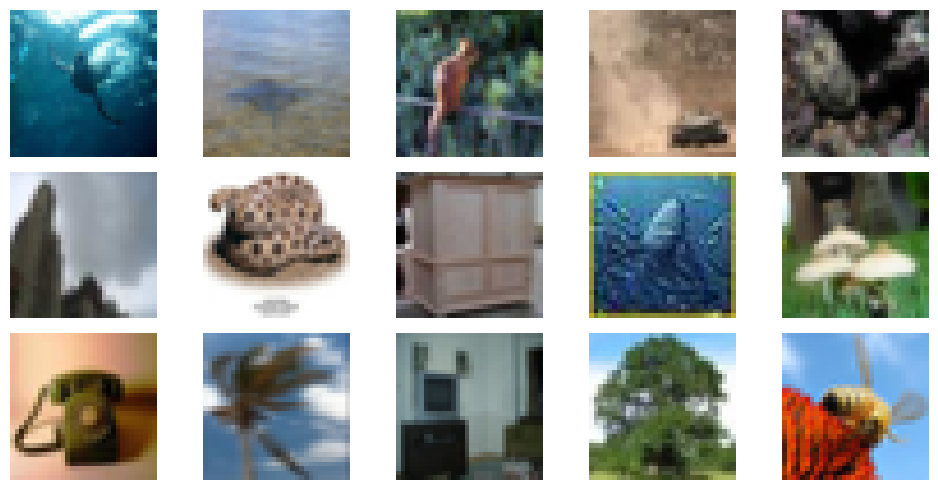

In [ ]:

# Training images

num_images = 15

# Plot the images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_train[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

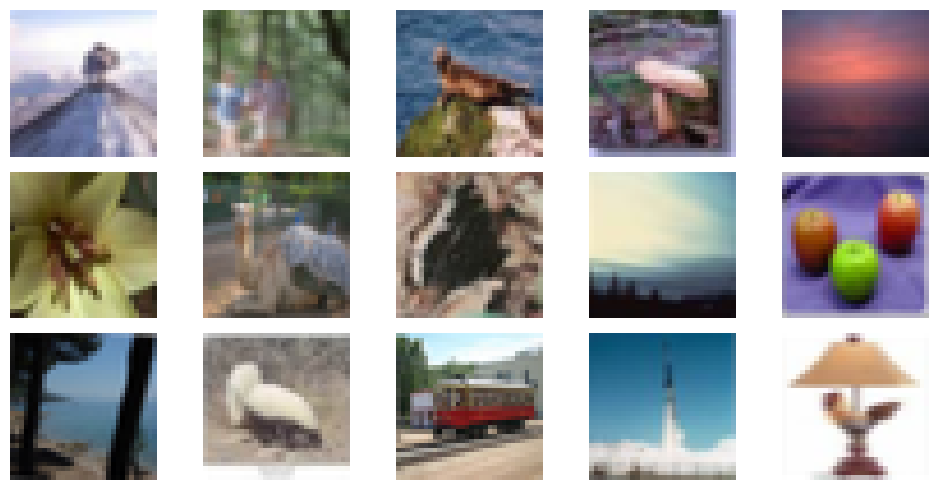

In [ ]:
num_images = 15
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_test[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
num_epochs = 45
batch_size = 32

In [ ]:
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=20)

### Original model (without regularization)

In [ ]:
model_ = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])


model_.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history_ = model_.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/45
1407/1407 [==============================] - 101s 71ms/step - loss: 2.4216 - accuracy: 0.2468 - val_loss: 2.1549 - val_accuracy: 0.3318
Epoch 2/45
1407/1407 [==============================] - 95s 67ms/step - loss: 2.0215 - accuracy: 0.3710 - val_loss: 1.9264 - val_accuracy: 0.4008
Epoch 3/45
1407/1407 [==============================] - 88s 62ms/step - loss: 1.8044 - accuracy: 0.4370 - val_loss: 1.7881 - val_accuracy: 0.4392
Epoch 4/45
1407/1407 [==============================] - 83s 59ms/step - loss: 1.6447 - accuracy: 0.4833 - val_loss: 1.7480 - val_accuracy: 0.4520
Epoch 5/45
1407/1407 [==============================] - 85s 60ms/step - loss: 1.5097 - accuracy: 0.5238 - val_loss: 1.7105 - val_accuracy: 0.4630
Epoch 6/45
1407/1407 [==============================] - 84s 60ms/step - loss: 1.3909 - accuracy: 0.5562 - val_loss: 1.6649 - val_accuracy: 0.4882
Epoch 7/45
1407/1407 [==============================] - 84s 60ms/step - loss: 1.2841 - accuracy: 0.5890 - val_loss: 1.6803 

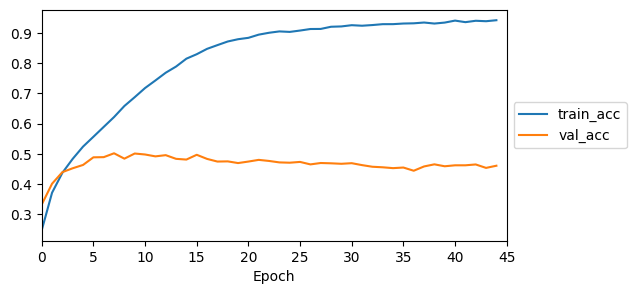

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

num_epochs = len(history_.history['accuracy'])
accuracy_df = pd.DataFrame(history_.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'})

accuracy_df.plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
y_pred_ = model_.predict(X_test)
y_pred_ = np.argmax(y_pred_, axis=1)
acc_ = tf.keras.metrics.Accuracy()(y_test, y_pred_).numpy()
print('Base model accuracy:', acc_)

313/313 [==============================] - 5s 15ms/step
Base model accuracy: 0.4551


### L1 L2 regularization

In [ ]:
model_l1l2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(100, activation='relu', ),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_l1l2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_l1l2 = model_l1l2.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/45
1407/1407 [==============================] - 234s 166ms/step - loss: 3.0903 - accuracy: 0.1464 - val_loss: 2.6253 - val_accuracy: 0.2040
Epoch 2/45
1407/1407 [==============================] - 228s 162ms/step - loss: 2.5801 - accuracy: 0.2258 - val_loss: 2.5331 - val_accuracy: 0.2356
Epoch 3/45
1407/1407 [==============================] - 227s 162ms/step - loss: 2.4983 - accuracy: 0.2510 - val_loss: 2.4429 - val_accuracy: 0.2698
Epoch 4/45
1407/1407 [==============================] - 232s 165ms/step - loss: 2.4333 - accuracy: 0.2716 - val_loss: 2.4114 - val_accuracy: 0.2686
Epoch 5/45
1407/1407 [==============================] - 228s 162ms/step - loss: 2.3617 - accuracy: 0.2955 - val_loss: 2.3302 - val_accuracy: 0.2986
Epoch 6/45
1407/1407 [==============================] - 232s 165ms/step - loss: 2.2911 - accuracy: 0.3186 - val_loss: 2.2794 - val_accuracy: 0.3236
Epoch 7/45
1407/1407 [==============================] - 227s 161ms/step - loss: 2.2306 - accuracy: 0.3367 - val_

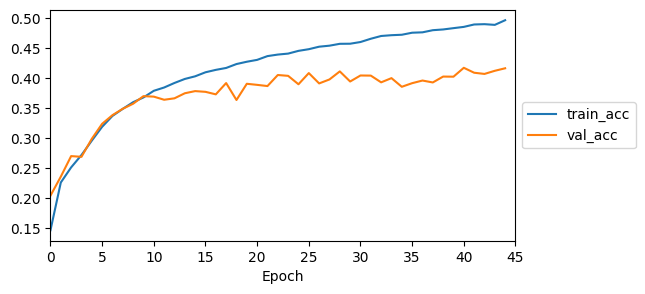

In [ ]:
pd.DataFrame(history_l1l2.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_l1l2 = model_l1l2.predict(X_test)
y_pred_l1l2 = np.argmax(y_pred_l1l2, axis=1)
acc_l1l2 = tf.keras.metrics.Accuracy()(y_test, y_pred_l1l2).numpy()
print('Model accuracy with L1 L2 regularization:', acc_l1l2)

313/313 [==============================] - 12s 37ms/step
Model accuracy with L1 L2 regularization: 0.4128


### Dropout

In [ ]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_dropout = model_dropout.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/45
1407/1407 [==============================] - 233s 164ms/step - loss: 2.5848 - accuracy: 0.1932 - val_loss: 2.3073 - val_accuracy: 0.2794
Epoch 2/45
1407/1407 [==============================] - 225s 160ms/step - loss: 2.2217 - accuracy: 0.3156 - val_loss: 2.0456 - val_accuracy: 0.3698
Epoch 3/45
1407/1407 [==============================] - 223s 159ms/step - loss: 2.0446 - accuracy: 0.3676 - val_loss: 1.8913 - val_accuracy: 0.4066
Epoch 4/45
1407/1407 [==============================] - 233s 165ms/step - loss: 1.9192 - accuracy: 0.4074 - val_loss: 1.8504 - val_accuracy: 0.4238
Epoch 5/45
1407/1407 [==============================] - 227s 161ms/step - loss: 1.8286 - accuracy: 0.4340 - val_loss: 1.7754 - val_accuracy: 0.4490
Epoch 6/45
1407/1407 [==============================] - 226s 161ms/step - loss: 1.7615 - accuracy: 0.4545 - val_loss: 1.7179 - val_accuracy: 0.4724
Epoch 7/45
1407/1407 [==============================] - 226s 160ms/step - loss: 1.6991 - accuracy: 0.4691 - val_

In [ ]:
pd.DataFrame(history_dropout.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_dropout = model_dropout.predict(X_test)
y_pred_dropout = np.argmax(y_pred_dropout, axis=1)
acc_dropout = tf.keras.metrics.Accuracy()(y_test, y_pred_dropout).numpy()
print('Model accuracy with Dropout:', acc_dropout)

### Early Stopping

In [ ]:
model_es = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_es.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=1)

# Train model
history_es = model_es.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size, callbacks=[early_stopping_cb])

In [ ]:
pd.DataFrame(history_es.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_es = model_es.predict(X_test)
y_pred_es = np.argmax(y_pred_es, axis=1)
acc_es = tf.keras.metrics.Accuracy()(y_test, y_pred_es).numpy()
print('Model accuracy with early stopping:', acc_es)

### Monte Carlo Dropout

In [ ]:
model_mc = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_mc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_mc = model_mc.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

In [ ]:
pd.DataFrame(history_mc.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Define Monte Carlo Dropout function
def monte_carlo_dropout(model, X, n=50):
    y_prob = []
    for i in range(n):
        y_prob.append(model.predict(X))
    y_prob = tf.stack(y_prob, axis=0)
    y_prob = tf.reduce_mean(y_prob, axis=0)
    y_pred = tf.argmax(y_prob, axis=1)
    return y_pred

# Evaluate model with Monte Carlo Dropout
sample_indices = np.random.choice(X_test.shape[0], size=1000, replace=False)
X_test_sample = X_test[sample_indices]
y_test_sample = y_test[sample_indices]

y_pred_mc = monte_carlo_dropout(model_mc, X_test_sample)
y_pred_mc = tf.squeeze(y_pred_mc)
y_pred_mc = np.argmax(y_pred_mc, axis=1)
acc_mc = tf.keras.metrics.Accuracy()(y_test_sample, y_pred_mc).numpy()
print('Accuracy with Monte Carlo Dropout:', acc_mc)

### Batch Normalization

In [ ]:
model_bn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_bn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_bn = model_bn.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

In [ ]:
pd.DataFrame(history_bn.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_bn = model_bn.predict(X_test)
y_pred_bn = np.argmax(y_pred_bn, axis=1)
acc_bn = tf.keras.metrics.Accuracy()(y_test, y_pred_bn).numpy()
print('Model accuracy with batch normalization:', acc_bn)

Adding batch normalization layers reduced the validation set accuracy significantly as compared to the training accuracy (overfitting might be occuring in this case).

### Custom dropout

In [ ]:
class CustomDropout(tf.keras.layers.Layer):
    def __init__(self, rate):
      super(CustomDropout, self).__init__()
      self.rate = rate
        
    def call(self, inputs, training=None):
      if training:
        mask = tf.random.uniform(shape=tf.shape(inputs), minval=0.0, maxval=1.0) >= self.rate
        mask = tf.cast(mask, dtype=inputs.dtype)
        output = inputs * mask
      else:
        output = inputs
        
      return output

In [ ]:
model_custom_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    CustomDropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    CustomDropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_custom_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_custom_dropout = model_custom_dropout.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

In [ ]:
pd.DataFrame(history_custom_dropout.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

In [ ]:
y_pred_custom_dropout = model_custom_dropout.predict(X_test)
y_pred_custom_dropout = np.argmax(y_pred_custom_dropout, axis=1)
acc_custom_dropout = tf.keras.metrics.Accuracy()(y_test, y_pred_custom_dropout).numpy()
print('Model accuracy with custom dropout:', acc_custom_dropout)

### Custom regularization

In [ ]:
def custom_regularizer(weight_matrix):
    return tf.reduce_sum(tf.abs(tf.square(weight_matrix))) * 0.001

In [ ]:
model_custom_reg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_custom_reg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_custom_reg = model_custom_reg.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

In [ ]:
pd.DataFrame(history_custom_reg.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_custom_reg = model_custom_reg.predict(X_test)
y_pred_custom_reg = np.argmax(y_pred_custom_reg, axis=1)
acc_custom_reg = tf.keras.metrics.Accuracy()(y_test, y_pred_custom_reg).numpy()
print('Model accuracy with custom regularization:', acc_custom_reg)

Custom regularizer -  calculates the sum of the absolute values of the squared weight matrix, multiplied by a constant value of 0.001. This custom regularizer does not perform as well as other regularization techniques.